# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
# Your code here - Manipulate column names
subs = [(' ', '_'), ('.', ''), ("'", ""), ('™', ''), ('®',''), ('+','plus'), ('½','half'), ('-','_')]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old, new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [4]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [6]:
# Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [7]:
# Your code here - Split into train and test
train, test = train_test_split(df)

print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
6947,-0.436637,12.1878,-0.426440,-4.140649,-1.082024,-0.365010,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
80,-0.396935,19.9900,-0.258873,-0.132473,-0.252954,-0.043117,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2529,-0.567771,19.4922,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1897,4.302242,426.9878,4.321291,0.216064,0.368848,0.439724,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3541,-0.603863,11.9520,0.662745,-0.481010,-1.289292,-2.296371,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
5649,0.170912,91.4390,-0.398512,1.087407,-0.045687,-1.974478,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9553,-0.368062,28.3929,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2665,-0.337985,19.4922,-0.175090,0.041796,-0.252954,1.083511,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6803,-0.230912,34.9860,-0.175090,-1.526621,-1.082024,-1.008797,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,-0.366859,19.1520,-0.203018,-0.132473,0.368848,0.922564,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
# Your code here - Fit the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     578.3
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:29:21   Log-Likelihood:                -40558.
No. Observations:                8152   AIC:                         8.131e+04
Df Residuals:                    8057   BIC:                         8.197e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.7036      1.704     38.555      0.000      62.363      69.044
piece_count                                         75.5109      0.922     81.892      0.000      73.703      77.318
num_reviews                                          6.6684      0.681      9.796      0.000       5.334       8.003
play_star_rating                                     5.0302      0.627      8.019      0.000       3.801       6.260
star_rating                                         -1.2854      0.717     -1.793      0.073      -2.691       0.120
val_star_rating                                     -8.7208      0.638    -13.663      0.000      -9.972      -7.470
ages_10plus                                        117.3418      6.495     18.065      0.000     104.609     130.075
ages_10_14                                         -23.5688      9.834     -2.397      0.017     -42.845      -4.292
ages_10_16                                         -11.3383      4.149     -2.733      0.006     -19.472      -3.204
ages_10_21                                          61.2942      7.195      8.519      0.000      47.190      75.399
ages_11_16                                         -20.0045      6.132     -3.262      0.001     -32.025      -7.984
ages_12plus                                         69.1997      5.549     12.470      0.000      58.322      80.078
ages_12_16                                         -57.9627      6.665     -8.696      0.000     -71.028     -44.897
ages_14plus                                         23.9336      4.051      5.908      0.000      15.992      31.875
ages_16plus                                         37.1775      6.148      6.047      0.000      25.125      49.230
ages_1half_3                                        -9.5342      2.468     -3.863      0.000     -14.373      -4.696
ages_1half_5                                        -4.5778      3.136     -1.460      0.144     -10.725       1.570
ages_2_5                                            15.0390      1.720      8.742      0.000      11.667      18.411
ages_4plus                                         -19.0242      6.924     -2.748      0.006     -32.596      -5.452
ages_4_7                                            -6.6970      3.348     -2.000      0.045     -13.260      -0.134
ages_4_99                                           -3.5555      3.881     -0.916      0.360     -11.163       4.052
ages_5plus                                         -10.2625      3.232     -3.175      0.002     -16.598      -3.927
ages_5_12                                          -36.1922      3.154    -11.473      0.000     -42.376     -30.009
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [10]:
# Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 71
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,65.7036,1.704,38.555,0.000,62.363,69.044
piece_count,75.5109,0.922,81.892,0.000,73.703,77.318
num_reviews,6.6684,0.681,9.796,0.000,5.334,8.003
play_star_rating,5.0302,0.627,8.019,0.000,3.801,6.260
star_rating,-1.2854,0.717,-1.793,0.073,-2.691,0.120


In [11]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     776.4
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:33:44   Log-Likelihood:                -40569.
No. Observations:                8152   AIC:                         8.128e+04
Df Residuals:                    8081   BIC:                         8.178e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           67.4685      2.402     28.085      0.000      62.759      72.178
piece_count                                         75.7775      0.908     83.493      0.000      73.998      77.557
num_reviews                                          6.8328      0.674     10.136      0.000       5.511       8.154
play_star_rating                                     4.5532      0.527      8.635      0.000       3.520       5.587
val_star_rating                                     -9.2916      0.502    -18.493      0.000     -10.277      -8.307
ages_10plus                                        121.9917      7.436     16.406      0.000     107.415     136.568
ages_10_14                                         -20.8794     10.356     -2.016      0.044     -41.181      -0.578
ages_10_16                                         -11.4506      4.387     -2.610      0.009     -20.051      -2.850
ages_10_21                                          66.2251      7.935      8.346      0.000      50.671      81.779
ages_11_16                                         -21.1954      6.291     -3.369      0.001     -33.527      -8.864
ages_12plus                                         71.9042      6.663     10.791      0.000      58.842      84.966
ages_12_16                                         -56.3080      7.213     -7.807      0.000     -70.447     -42.169
ages_14plus                                         26.3013      4.965      5.297      0.000      16.568      36.034
ages_16plus                                         37.4232      7.110      5.263      0.000      23.485      51.361
ages_1half_3                                        -5.9801      3.649     -1.639      0.101     -13.134       1.174
ages_2_5                                            18.0249      2.717      6.634      0.000      12.699      23.351
ages_4plus                                         -17.8519     10.549     -1.692      0.091     -38.530       2.826
ages_4_7                                            -4.3125      2.827     -1.525      0.127      -9.855       1.229
ages_5plus                                          -9.8010      3.316     -2.955      0.003     -16.302      -3.300
ages_5_12                                          -32.1407      3.213    -10.003      0.000     -38.439     -25.842
ages_6plus                                         -24.9492      5.788     -4.311      0.000     -36.295     -13.604
ages_6_12                                          -18.6610      2.581     -7.231      0.000     -23.720     -13.602
ages_7_12                                          -18.5009      2.840     -6.514      0.000     -24.068     -12.934
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [12]:
# Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

72 62
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,67.4685,2.402,28.085,0.0,62.759,72.178
piece_count,75.7775,0.908,83.493,0.0,73.998,77.557
num_reviews,6.8328,0.674,10.136,0.0,5.511,8.154
play_star_rating,4.5532,0.527,8.635,0.0,3.520,5.587
val_star_rating,-9.2916,0.502,-18.493,0.0,-10.277,-8.307


In [13]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     889.6
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:35:24   Log-Likelihood:                -40578.
No. Observations:                8152   AIC:                         8.128e+04
Df Residuals:                    8090   BIC:                         8.171e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.4448      1.376     47.578      0.000      62.748      68.141
piece_count                                         75.8187      0.908     83.544      0.000      74.040      77.598
num_reviews                                          6.5270      0.642     10.165      0.000       5.268       7.786
play_star_rating                                     4.6545      0.525      8.865      0.000       3.625       5.684
val_star_rating                                     -9.4015      0.499    -18.824      0.000     -10.381      -8.423
ages_10plus                                        124.0207      7.306     16.975      0.000     109.699     138.342
ages_10_14                                         -17.9342     10.199     -1.758      0.079     -37.927       2.059
ages_10_16                                          -8.0254      3.942     -2.036      0.042     -15.753      -0.298
ages_10_21                                          68.2385      7.826      8.719      0.000      52.898      83.580
ages_11_16                                         -17.8388      6.008     -2.969      0.003     -29.616      -6.062
ages_12plus                                         74.2063      6.526     11.370      0.000      61.413      86.999
ages_12_16                                         -52.8533      6.967     -7.586      0.000     -66.511     -39.196
ages_14plus                                         29.8746      4.681      6.382      0.000      20.698      39.051
ages_16plus                                         41.1132      6.930      5.933      0.000      27.529      54.698
ages_2_5                                            21.3966      1.914     11.180      0.000      17.645      25.148
ages_5plus                                          -8.0823      3.178     -2.543      0.011     -14.312      -1.853
ages_5_12                                          -28.6927      2.615    -10.971      0.000     -33.820     -23.566
ages_6plus                                         -21.6053      5.468     -3.951      0.000     -32.324     -10.887
ages_6_12                                          -15.1795      1.765     -8.599      0.000     -18.640     -11.719
ages_7_12                                          -15.1874      2.123     -7.154      0.000     -19.349     -11.026
ages_7_14                                          -10.2102      1.849     -5.523      0.000     -13.834      -6.586
ages_8plus                                          21.5613      5.006      4.307      0.000      11.748      31.375
ages_8_12                                          -16.0724      2.734     -5.878      0.000     -21.432     -10.713
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [14]:
# Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.560012934024817),
 ('num_reviews', 2.6149058433440313),
 ('play_star_rating', 1.8082456827144655),
 ('val_star_rating', 1.6277576638686286),
 ('ages_10plus', 17.768800217900107),
 ('ages_10_14', 1.097137665743289),
 ('ages_10_16', 1.1656965975996554),
 ('ages_10_21', 7.157308191831795),
 ('ages_11_16', 1.1595065277192012),
 ('ages_12plus', 7.235370024367017),
 ('ages_12_16', 1.1691229827984784),
 ('ages_14plus', 2.191171818181445),
 ('ages_16plus', 9.495021933594808),
 ('ages_2_5', 1.1905376567491082),
 ('ages_5plus', inf),
 ('ages_5_12', 3.124402703208839),
 ('ages_6plus', 2.6582788849276446),
 ('ages_6_12', 1.7800616903505677),
 ('ages_7_12', 1.4719090487174082),
 ('ages_7_14', 1.7127664714333233),
 ('ages_8plus', 3.3284169836711985),
 ('ages_8_12', 1.274941984637375),
 ('ages_8_14', 1.8623251021605107),
 ('ages_9plus', 1.5485371909589838),
 ('ages_9_12', 1.0188698812447354),
 ('ages_9_14', 1.851918554820572),
 ('theme_name_Architecture', 5.8978936498290935),
 ('th

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [15]:
# Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x, vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

62 53


In [16]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     921.3
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:37:45   Log-Likelihood:                -40953.
No. Observations:                8152   AIC:                         8.201e+04
Df Residuals:                    8098   BIC:                         8.239e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           71.0299      1.078     65.910      0.000      68.917      73.142
piece_count                                         77.9998      0.692    112.734      0.000      76.644      79.356
num_reviews                                          5.0543      0.626      8.074      0.000       3.827       6.281
play_star_rating                                     6.4541      0.489     13.192      0.000       5.495       7.413
val_star_rating                                    -11.2694      0.494    -22.791      0.000     -12.239     -10.300
ages_10_14                                         -35.0411     10.584     -3.311      0.001     -55.789     -14.293
ages_10_16                                         -17.4205      3.833     -4.545      0.000     -24.934      -9.907
ages_11_16                                         -31.6293      5.880     -5.379      0.000     -43.156     -20.103
ages_12_16                                         -66.9960      6.740     -9.940      0.000     -80.208     -53.784
ages_14plus                                          6.7388      3.850      1.750      0.080      -0.808      14.285
ages_2_5                                            16.2275      1.826      8.889      0.000      12.649      19.806
ages_5_12                                          -34.6202      2.617    -13.227      0.000     -39.751     -29.490
ages_6plus                                         -28.4014      5.656     -5.022      0.000     -39.488     -17.315
ages_6_12                                          -22.6793      1.607    -14.116      0.000     -25.829     -19.530
ages_7_12                                          -22.2253      2.027    -10.962      0.000     -26.200     -18.251
ages_7_14                                          -17.0050      1.731     -9.823      0.000     -20.399     -13.611
ages_8plus                                          -0.4472      4.413     -0.101      0.919      -9.098       8.203
ages_8_12                                          -22.9288      2.633     -8.709      0.000     -28.089     -17.768
ages_8_14                                          -17.8695      1.826     -9.788      0.000     -21.448     -14.291
ages_9plus                                          18.8305      9.570      1.968      0.049       0.071      37.590
ages_9_12                                          -32.8753      6.848     -4.801      0.000     -46.300     -19.451
ages_9_14                                          -17.5701      2.544     -6.907      0.000     -22.556     -12.584
theme_name_BOOST                                    85.9012     10.117      8.490      0.000      66.069     105.734
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

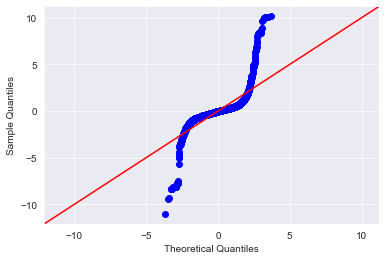

In [17]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True);

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

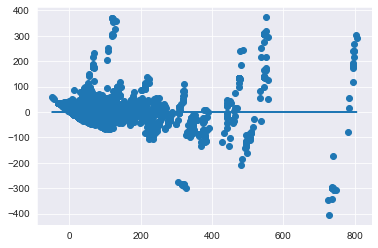

In [18]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))]);

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

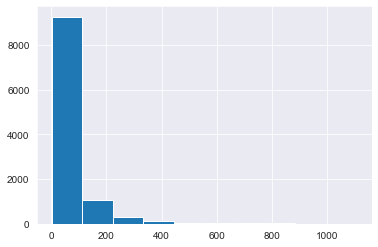

In [20]:
df.list_price.hist();

In [21]:
for i in range(80, 100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q = q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [22]:
orig_tot = len(df)
df = df[df.list_price < 450]
print('Percent removed:', (orig_tot - len(df)) / orig_tot)
df.list_price = df.list_price.map(np.log)
train, test = train_test_split(df)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = train).fit()
model.summary()

Percent removed: 0.010487580496780129


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     459.2
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:42:03   Log-Likelihood:                -4993.0
No. Observations:                8067   AIC:                         1.009e+04
Df Residuals:                    8013   BIC:                         1.047e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4097      0.014    252.207      0.000       3.383       3.436
piece_count                                          0.5892      0.010     57.049      0.000       0.569       0.609
num_reviews                                         -0.0144      0.008     -1.866      0.062      -0.030       0.001
play_star_rating                                     0.1166      0.006     19.223      0.000       0.105       0.128
val_star_rating                                     -0.1643      0.006    -27.078      0.000      -0.176      -0.152
ages_10_14                                           0.4357      0.114      3.811      0.000       0.212       0.660
ages_10_16                                           0.6378      0.046     13.743      0.000       0.547       0.729
ages_11_16                                           0.3926      0.073      5.414      0.000       0.250       0.535
ages_12_16                                           0.1383      0.083      1.659      0.097      -0.025       0.302
ages_14plus                                          0.4989      0.052      9.503      0.000       0.396       0.602
ages_2_5                                             0.4780      0.022     21.446      0.000       0.434       0.522
ages_5_12                                           -0.7023      0.032    -22.063      0.000      -0.765      -0.640
ages_6plus                                          -0.9013      0.071    -12.686      0.000      -1.041      -0.762
ages_6_12                                           -0.1083      0.020     -5.542      0.000      -0.147      -0.070
ages_7_12                                            0.1510      0.025      6.036      0.000       0.102       0.200
ages_7_14                                            0.0430      0.021      2.023      0.043       0.001       0.085
ages_8plus                                           0.5371      0.057      9.381      0.000       0.425       0.649
ages_8_12                                            0.3155      0.033      9.680      0.000       0.252       0.379
ages_8_14                                            0.3974      0.023     17.413      0.000       0.353       0.442
ages_9plus                                           0.1532      0.119      1.285      0.199      -0.081       0.387
ages_9_12                                            0.3812      0.081      4.699      0.000       0.222       0.540
ages_9_14                                            0.5757      0.032     17.754      0.000       0.512       0.639
theme_name_BOOST                                     1.0204      0.120      8.514      0.000       0.785       1.255
theme_name_Blues_Helicopter_Pursuit      

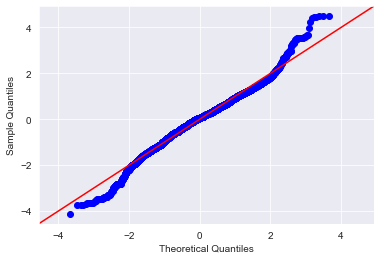

In [23]:
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True);

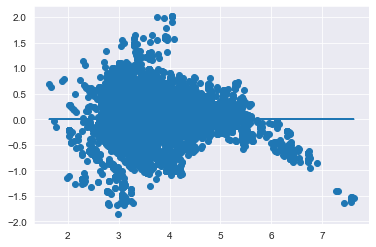

In [24]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))]);

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


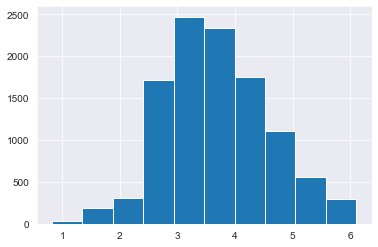

In [25]:
for i in range(80, 100):
    q = i/100
    print('{} percentile: {}'.format(q, df.list_price.quantile(q = q)))

df.list_price.hist()

In [26]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:45:40   Log-Likelihood:                -4880.9
No. Observations:                8027   AIC:                             9870.
Df Residuals:                    7973   BIC:                         1.025e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4231      0.014    251.076      0.000       3.396       3.450
piece_count                                          0.6412      0.011     58.012      0.000       0.620       0.663
num_reviews                                         -0.0231      0.008     -2.864      0.004      -0.039      -0.007
play_star_rating                                     0.1037      0.006     17.180      0.000       0.092       0.116
val_star_rating                                     -0.1545      0.006    -25.608      0.000      -0.166      -0.143
ages_10_14                                           0.4757      0.124      3.847      0.000       0.233       0.718
ages_10_16                                           0.6231      0.046     13.685      0.000       0.534       0.712
ages_11_16                                           0.2556      0.068      3.756      0.000       0.122       0.389
ages_12_16                                          -0.0855      0.093     -0.923      0.356      -0.267       0.096
ages_14plus                                          0.4676      0.053      8.750      0.000       0.363       0.572
ages_2_5                                             0.4840      0.022     21.884      0.000       0.441       0.527
ages_5_12                                           -0.6672      0.032    -20.990      0.000      -0.730      -0.605
ages_6plus                                          -0.8900      0.074    -11.997      0.000      -1.035      -0.745
ages_6_12                                           -0.0981      0.020     -5.006      0.000      -0.136      -0.060
ages_7_12                                            0.1335      0.024      5.459      0.000       0.086       0.181
ages_7_14                                            0.0567      0.021      2.701      0.007       0.016       0.098
ages_8plus                                           0.6018      0.055     10.952      0.000       0.494       0.710
ages_8_12                                            0.2951      0.032      9.333      0.000       0.233       0.357
ages_8_14                                            0.4025      0.022     17.923      0.000       0.358       0.447
ages_9plus                                           0.1456      0.124      1.173      0.241      -0.098       0.389
ages_9_12                                            0.3774      0.079      4.761      0.000       0.222       0.533
ages_9_14                                            0.5662      0.031     17.990      0.000       0.504       0.628
theme_name_BOOST                                     1.0414      0.118      8.790      0.000       0.809       1.274
theme_name_Blues_Helicopter_Pursuit      

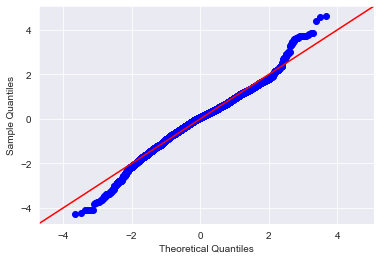

In [27]:
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True);

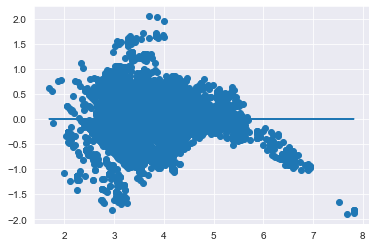

In [28]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))]);

### An alternative approach

In [29]:
x_cols = ['piece_count', 'country_US']

In [30]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     4413.
Date:                Tue, 13 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:47:43   Log-Likelihood:                -7448.6
No. Observations:                8027   AIC:                         1.490e+04
Df Residuals:                    8024   BIC:                         1.492e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7380      0.007    527.888      0.000       3.724       3.752
piece_count     0.7838      0.008     93.213      0.000       0.767       0.800
country_US     -0.2751      0.028     -9.873      0.000      -0.330      -0.220
==============================================================================
Omnibus:                      483.831   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.937
Skew:                          -0.519   Prob(JB):                    9.34e-156
Kurtosis:                       4.028   Cond. No.                         4.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

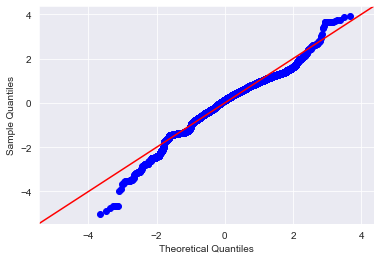

In [31]:
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True)

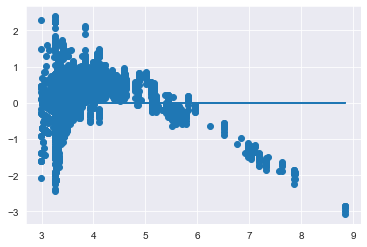

In [32]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))]);

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 